## Юнит 5. Основные алгоритмы машинного обучения. Часть I 
### ML-3A. Регрессия 

План модуля:
1. Линейная регрессия.
2. Ошибки в линейной регрессии.
3. Прямой поиск.
4. Логистическая регрессия.

**Регрессия** — класс задач обучения ***с учителем***, когда по определённому набору признаков объекта нужно предсказать целевую переменную.

### 3A.2. Линейная регрессия
#### Реализация в Python
Обучим совсем простую модель, которая будет предсказывать тормозной путь автомобиля в зависимости от скорости.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
myData = pd.read_csv('mycar.csv')

In [4]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Speed          49 non-null     int64
 1   Stopping_dist  49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


In [5]:
myData.head(5)

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


У нас здесь всего два признака: один из них будет зависимой переменной, а другой — независимой.  
Обозначим их:


In [9]:
X = myData.iloc[:,:-1].values #Speed
Y = myData.iloc[:,1].values  #Stopping_dist

Для начала нам необходимо разделить выборку (то есть все наши объекты) на **обучающую** и **тестовую**. Давайте разберемся, зачем это нужно.

Дело в том, что нам не столько важно, насколько успешно будет алгоритм давать предсказания на наших данных, сколько важно, чтобы он показывал хорошие результаты на реальных данных, «в бою». Можно привести следующую аналогию: обучающая выборка — это тренировочные примеры для нашего алгоритма, а тестовая — экзаменационные.

Обычно выборка делится на обучающую и тестовую не в равных долях: на обучающую  мы берем 70-80 % наблюдений, а на тестовую — 20-30 % наблюдений.

Подгрузим нужную функцию для разбиения:

In [10]:
from sklearn.model_selection import train_test_split

Теперь с помощью этой функции мы получаем независимые и зависимые переменные из обучающей и тестовой выборки. Размер тестовой выборки задаем 0,3.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

Теперь обучим модель:

In [12]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression()

Итак, модель обучена. Что теперь?

Теперь можем попробовать предсказать значения зависимой переменной для тестовой выборки:

In [13]:
y_pred = myModel.predict(X_test)
y_pred

array([38.22182297, 42.00279782, 76.03157144, 38.22182297, 45.78377266,
       60.90767205, 26.87889843, 57.1266972 , 30.65987328, 19.31694873,
       23.09792358, 49.56474751, 45.78377266, 49.56474751, 49.56474751])

Но как узнать, насколько модель хороша? Для этого мы в будущих уроках научимся сравнивать, насколько предсказанные значения близки к реальным.

### Задание 3.2.1
Какая из этих задач является задачей линейной регрессии?  
Ответ:
- Предсказание зарплаты на основе опыта работы, образования и т.д

### Задание 3.2.2
Почему для этих данных не подходит модель линейной регрессии?  
Ответ:
- Дисперсия шума зависит от x




### Задание 3.2.3
Какой размер будет у матрицы X (матрица признаков) для данных в таблице? Задача — модель предсказания продаж.  
Ответ:
- (3*2) 

### 3A.3. Ошибки в линейной регрессии


Есть несколько способов посчитать ошибку, один из них — средняя квадратичная ошибка (mean squared error, MSE).  
  
Как правило, при увеличении сложности модели увеличивается **дисперсия** (разброс) оценки, но уменьшается **смещение**. Если модель слабая, то она не в состоянии выучить закономерность, в результате выучивается что-то другое, смещённое относительно правильного решения.

Построить модель регрессии не так уж и сложно. Но после ее построения возникает логичный вопрос: насколько хорошо она предсказывает нужный нам признак и можно ли улучшить его качество? Для этого надо уметь измерять какие-то показатели, по которым можно судить о качестве модели.

Для каждого значения переменной Х мы имеет реальное значение и предсказанное. Для того, чтобы оценить качество алгоритма, нам надо научиться определять, насколько предсказанное значения отличается от реального. Есть несколько способов это сделать.

**MAE (Mean Absolute Error)**. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

**MSE (Mean Squared Error)**. Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным значением и реальным мы берем квадрат этого модуля/

**RMSE (Root Mean Squared Error)**. Для получения RMSE надо просто извлечь квадратный корень из MSE

**MAPE (Mean Absolute Percent Error)** — реже используемая, но все равно важная метрика. Для ее вычисления модуль разницы между предсказанием алгоритма и истинным значением мы делим на истинное значение. Потом складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %. Итак, эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения.

Реализация на Python  
Подгружаем нужные библиотеки:

In [15]:
import pandas as pd               # библиотека для работы с таблицами
import numpy as np                # библиотека для работы с матрицами

Предположим, что у нас есть показатели уровня счастья для пяти человек:



In [16]:
y_happy = [4,20,110,15,23]

Допустим, у нас есть показатели счастья для этих же пяти человек, но предсказанные некоторым алгоритмом:



In [17]:
y_happy_pred = [5,15,100,9,21]

Давайте вычислим метрики для этих данных!



In [19]:
from sklearn import metrics  # подгружаем метрики

In [20]:
#Вычисляем MAE:

MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)

print(MAE)

4.8


In [21]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [22]:
#Вычисляем коэффициент детерминации:

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


Теперь мы умеем обучить модель линейной регрессии и рассчитывать все  метрики для оценки ее качества.



### Задание 3.3.1
Чему равна MSE на этих данных F?

In [23]:
y_F = [1,3,2,5]

In [24]:
y_F_pred = [2,3,-1,4]

In [25]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_F, y_F_pred)
print(MSE)

2.75


### Задание 3.3.2
Что из этого является причиной использования MSE для задачи линейной регрессии?  
Ответ:
- Функция потерь непрерывная
- MSE сильнее штрафует за большие ошибки
- MSE выпуклая

### Задание 3.3.3
У какой из этих моделей большой bias, а у какой — variance?  
Ответ:
- У левой большой variance
- У правой большой bias



### 3A.4. Поиск прямой


#### Коэффициент детерминации
$R^2$ — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости. Коэффициент можно рассматривать как универсальную меру зависимости одной случайной величины от множества других.

**Интерпретация**
- Коэффициент детерминации принимает значения от 0 до 1.
- Для приемлемых моделей коэффициент должен быть не меньше 50 %.
- Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими.
- Коэффициент может быть отрицательным, это говорит о крайней неадекватности модели: простое среднее приближает лучше.  

Стоит отметить, что коэффициент детерминации довольно часто используется в научных исследованиях (особенно в социальных науках), однако в практических бизнес-задачах он часто бывает несостоятелен для оценки качества модели, и об этом необходимо помнить. Он может принимать очень низкие значения при полностью верной модели. И, наоборот, приближаться к единице при неверной модели.  

### Задание 3.4.1
Для каких данных лучше использовать OLS?  
Ответ:
- Если в обучающей выборке мало признаков 

### Задание 3.4.3
Для какой модели коэффициент детерминации будет больше? Обе модели построены методом OLS.  
Ответ:
- Примерно одинаковый  

### Задание 3.4.4
Для какой модели MSE будет больше? Обе модели построены методом OLS.  
Ответ: 
- Для второй 

### Задание 3.4.5
Чему равен коэффициент детерминации на этих данных? Укажите число с точностью до сотых:

In [27]:
yi_list = [2,3,-1,4]
fi_list = [1,3,2,5]
y_mean = sum(yi_list)/float(len(yi_list))
ss_tot = sum((yi-y_mean)**2 for yi in yi_list)
ss_err = sum((yi-fi)**2 for yi,fi in zip(yi_list,fi_list))
r2 = 1 - (ss_err/ss_tot)
r2

0.2142857142857143

### Задание 3.4.6
Чему будет равен коэффициент детерминации, если обучить линейную регрессию с помощью OLS на двух точках?  
Ответ: 1


### 3A.5 Линейная регрессия. Предобработка

Теперь эти данные готовы для построения регрессионной модели. Попробуем предсказать цену на квартиры с помощью нескольких признаков квартиры.

Но для начала освежим в памяти все этапы предобработки.

Начнём с подгружения нужных библиотек:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Теперь подгрузим файл и посмотрим на его первые строки:

In [57]:
data = pd.read_csv('data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


Также обязательно запрашиваем список переменных с их типами, заодно сможем посмотреть, сколько у нас пропусков:



In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [59]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визульно количество пропусков и их распределение:



import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

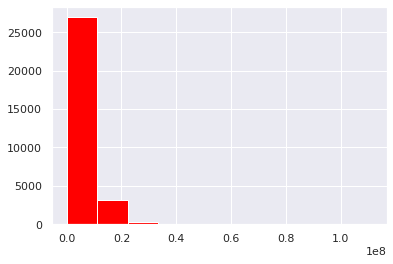

In [60]:
data.price_doc.hist(color='red');

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

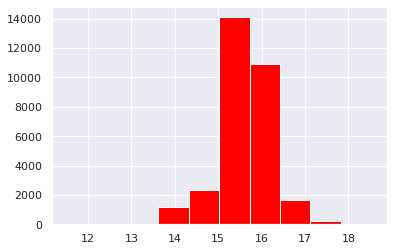

In [61]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist(color='red');

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

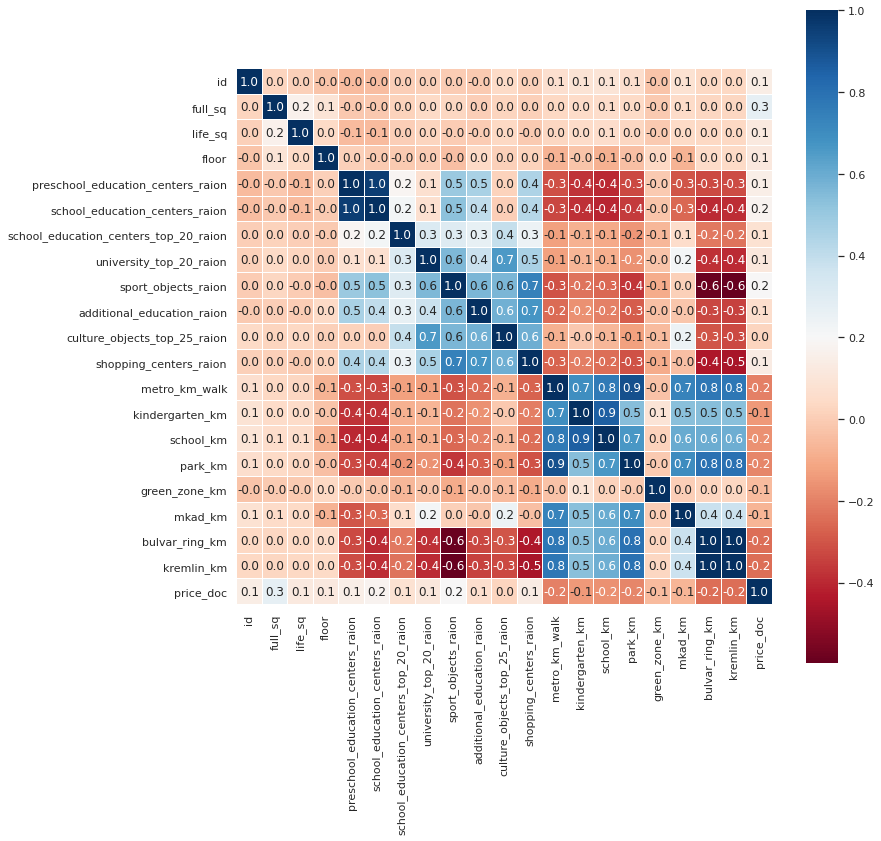

In [62]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

**Смотрим, у каких пар признаков сильная взаимосвязь:**

- Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
- Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
- Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
- Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

In [63]:
# Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.
data.drop(['life_sq', 'preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'kremlin_km'], axis=1, inplace=True)

### Задание 3.5.1
Удалите строки, где есть хотя бы один пропуск. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). Вычислите MSE , ответ запишите с точностью до сотых. Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от y! Округлите ответ до целых.

In [64]:
# Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора!
data.drop(['id'], axis=1, inplace=True)

In [65]:
# Удалите строки, где есть хотя бы один пропуск
data.dropna(axis=0, inplace = True)

In [66]:
columns_for_X = data.columns.tolist()
columns_for_X.remove('price_doc')

In [67]:
columns_for_X

['full_sq',
 'floor',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'metro_km_walk',
 'school_km',
 'green_zone_km',
 'mkad_km',
 'bulvar_ring_km']

In [68]:
# Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77

X = data[columns_for_X].values
Y = data['price_doc'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=77)

In [72]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

In [73]:
# Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам)
# Стандартизация числовых переменных

X_train = RobustScaler().fit_transform(X_train)
X_test = RobustScaler().fit_transform(X_test)

In [74]:
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [75]:
y_pred = myModel.predict(X_test)
y_pred

array([15.65798381, 15.65589304, 15.66092264, ..., 15.54311292,
       15.42951915, 16.39026336])

In [83]:
#Вычисляем MSE, находим экспоненциальную функцию от y:
MSE = metrics.mean_squared_error(np.exp(y_pred), np.exp(Y_test))
print(f"{round(MSE,0)}")

16647931507747.0


### 3A.6. Линейная регрессия. Практика №1


In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### 1. Линейная регрессия. Реализация


In [85]:
data = load_boston()
data['data'].shape

(506, 13)

In [86]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1.1. Реализация линейной регрессии с использованием матричных операций

Линейная регрессия выражается следующей зависимостью:
$$y=X\theta+\epsilon,$$
где $X$ — матрица объекты-признаки, $y$ — вектор целевых значений, соответствующих $X$, $\theta$ — параметр линейной регрессии, $\epsilon$ — некоторый шум.  

Из данного следует выражение для $\theta$ как:
$$X^Ty=X^TX\theta \rightarrow \theta=(X^TX)^{-1}X^Ty$$

Реализуем выражение для $\theta$ с помощью операций линейной алгебры библиотеки Numpy:

In [87]:
# ЗАДАЧА Реализовать функцию, осуществляющую матричные операции для получения theta
def linreg_linear(d_X, d_y):
    theta = np.linalg.lstsq(d_X, d_y)[0]
    return theta

In [88]:
# Подготовить данные
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [89]:
# Вычислить параметр theta
theta = linreg_linear(X, y)

<ipython-input-87-ab301f32bc94>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(d_X, d_y)[0]


In [90]:
theta.shape

(14,)

In [91]:
# Сделать предсказания для тренировочной выборки
y_pred = X.dot(theta)

In [92]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [93]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


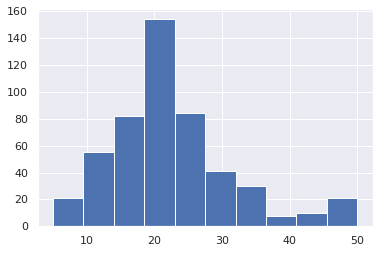

In [94]:
plt.hist(y);

In [95]:
# Разбить выборку на train/valid, вычислить theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = linreg_linear(X_train, y_train)
y_pred = X_valid.dot(theta)
y_train_pred = X_train.dot(theta)

<ipython-input-87-ab301f32bc94>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(d_X, d_y)[0]


In [96]:
print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

MSE = 20.61, RMSE = 4.54
MSE = 22.39, RMSE = 4.73


In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


### 1.2. Реализация линейной регрессии с использованием методов оптимизации


Для реализации линейной регрессии с помощью методов оптимизации будем использовать функцию ошибки **среднего квадратичного** ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), которая является выпуклой функцией в n-мерном пространстве $\mathbb{R}^n$ и в общем виде выглядит следующим образом:
$$MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - a(x_i))^2}.$$
Здесь $x_i$ — вектор-признак $i$-го объекта обучающей выборки, $y_i$ — истинное значение для $i$-го объекта, $a(x)$ — алгоритм, предсказывающий для данного объекта $x$ целевое значение, $n$ — кол-во объектов в выборке.

В случае линейной регрессии $MSE$ представляется как:
$$MSE(X, y, \theta) = \frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2} = \frac{1}{2n} \lVert{y - X\theta}\rVert_{2}^{2}=\frac{1}{2n} (y - X\theta)^T(y - X\theta),$$
где $\theta$ — параметр модели линейной регрессии, $X$ — матрица объекты-признаки, $y$ - вектор истинных значений, соответствующих $X$.

Возьмем первый вариант представления функции ошибки и посчитаем ее градиент по параметру $\theta$, предварительно переименовав $MSE$ в $L$:
$$L=\frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2}$$
$$\nabla L = \frac{1}{n}\sum_{i=1}^{n}{(\theta^Tx_i - y_i) \cdot x_i} = \frac{1}{n}X^T(X\theta - y)$$

Исходя из полученного выражения градиента, реализуем алгоритм градиентного спуска:

In [98]:
# Реализовать функцию вычисления градиента функции MSE

def calc_mse_gradient(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
    
    return grad

In [99]:
# Реализовать функцию, осуществляющую градиентный шаг
# (функция должна содержать параметр величины шага alpha - learning rate)

def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

In [100]:
# Реализовать функцию цикла градиентного спуска с доп. параметрами
# начального вектора theta и числа итераций

def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta


In [101]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

In [102]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)

In [103]:
theta

array([7.41647399e+246, 3.32349992e+247, 7.39564172e+247, 8.96295209e+247,
       5.07578059e+245, 4.22030567e+246, 4.63094053e+247, 5.29083888e+248,
       2.65643383e+247, 8.19991211e+247, 3.27135991e+249, 1.38363846e+248,
       2.64323053e+249, 9.88835598e+247])

In [104]:
# Проверить максимальные значения по каждому признаку в данных
X.max(axis=0)

array([  1.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ])

In [105]:
print(data['feature_names'][np.argmax(X.std(axis=0)) + 1])
print(np.max(X.std(axis=0)))

B
168.3704950393814


In [106]:
# Нормализовать даннные с помощью стандартной нормализации
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [107]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0)

array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
       2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
       1.79819419, 1.63882832, 0.44105193, 3.54877081])

In [108]:
# Оптимизировать theta на новых данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)

In [109]:
theta

array([ 2.25328063e+01, -9.21740195e-01,  1.07033639e+00,  1.06388396e-01,
        6.86667316e-01, -2.05006416e+00,  2.68062168e+00,  1.40667969e-02,
       -3.10608483e+00,  2.57511475e+00, -1.97802851e+00, -2.05725099e+00,
        8.48690321e-01, -3.74025884e+00])

In [110]:
# Сделать предсказания при полученных параметрах
y_pred = X.dot(theta)

In [111]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.90, RMSE = 4.68


In [112]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_mse_gradient, np.ones(m), 0.01, 5000)
y_pred = X_valid.dot(theta)

print_regression_metrics(y_valid, y_pred)

MSE = 24.77, RMSE = 4.98


### Задание 3.6.1
Реализуйте матричную линейную регрессию. Какой получился RMSE?
Ответ округлите до сотых.

In [113]:
data = load_boston()
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
theta = np.linalg.lstsq(X, y)[0]
y_pred = X.dot(theta)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {round(rmse,2)}")

RMSE: 4.68


<ipython-input-113-bb8580411963>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(X, y)[0]


### Задание 3.6.2
Постройте модель при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте RMSE.
*Ответ округлите до сотых.*

In [114]:
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
model.fit(X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {round(rmse,2)}")

RMSE: 4.68


### Задание 3.6.3
У какого из признаков наибольшее стандартное отклонение? Чему оно равно?  
*Ответ округлите до сотых.*

In [115]:
temp = np.argmax(X.std(axis=0))
temp2 = data['feature_names'][np.argmax(X.std(axis=0)) + 1]
temp3= np.max(X.std(axis=0))

print(f"наибольшее стандартное отклонение у признака c номером '{temp}'")
print(f"название признака : '{temp2}', оно равно: {round(temp3,2)}")

наибольшее стандартное отклонение у признака c номером '10'
название признака : 'B', оно равно: 168.37


### Задание 3.6.4
Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?  
*Ответ округлите до сотых.*

In [117]:
X, y = data['data'], data['target']
model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
model.fit(X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {round(rmse,2)}")

RMSE: 4.68


### Задание 3.6.5
Очистите данные от строк, где значение признака 'B' меньше 50. Какой получился RMSE?  
*Ответ округлите до сотых.*

In [118]:
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [119]:
# посмотрим где признак 'B' меньше 50
np.where(X[:,10]<50)

(array([], dtype=int64),)

Решение: нет ни одной строки где признак меньше 50, поэтому ответ не изменится  
Ответ: 4.68

### Задание 3.6.6
Нормализуйте признаки и обучите линейную регрессию матричным методом. Какой получился RMSE?  
*Ответ округлите до сотых.*

In [120]:
# Нормализовать даннные с помощью стандартной нормализации
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
theta = np.linalg.lstsq(X, y)[0]
y_pred = X.dot(theta)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {round(rmse,2)}")

RMSE: 4.68


<ipython-input-120-6e8a0efd03e6>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(X, y)[0]


### 3А.7. Линейная регрессия. Практика №2


In [121]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### 2.1.Когда использовать матричные операции вместо градиентного спуска в линейной регрессии

In [122]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')
    
def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

Прежде чем начать, обернем написанную нами линейную регрессию методом матричных операций в класс:

In [123]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

Проведем замеры скорости работы алгоритмов на матричных операциях и на градиентном спуске. Предварительно найдем параметры для метода, основанного на градиентном спуске, так, чтобы значения метрик максимально совпадало со значениями в случае первого алгоритма.

In [124]:
X, y = prepare_boston_data()

In [125]:
linreg_alg = LinRegAlgebra()
linreg_alg.fit(X, y)
y_pred = linreg_alg.predict(X)

# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [126]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def predict(self, X):
        raise NotImplementedError()

In [127]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [128]:
linreg_crit = LinReg(0.2,1000)
linreg_crit.fit(X, y)
y_pred = linreg_crit.predict(X)

# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [129]:
%timeit linreg_alg.fit(X, y)

33 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [130]:
%timeit linreg_crit.fit(X, y)

11.7 ms ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [131]:
linreg_crit.fit(X, y)

Как видно из результатов эксперимента, реализация на матричных операциях опережает реализацию на градиентном спуске в 500 раз. Но всегда ли это так и какие подводные камни могут быть? Ниже приведен набор случаев, при которых версия с градентным спуском предпочтительнее:

1. Градиентный спуск работает быстрее в случае матриц с большим количеством признаков. Основная по сложности операция — нахождение обратной матрицы $(X^T X)^{-1}$.
1. Нахождение обратной матрицы может также потребовать больше оперативной памяти, что иногда является не приемлемым.
1. Матричные операции могут также проигрывать и в случае небольших объемов данных, но при плохой параллельной реализации или недостаточных ресурсах.
1. Градиентный спуск может быть усовершенствован до так называемого **стохастического градиентного спуска**, при котором данные для оптимизации подгружаются небольшими наборами, что уменьшает требования по памяти.
1. В некоторых случаях (например, в случае линейно-зависимых строк) алгебраический способ решения не будет работать совсем в виду невозможности найти обратную матрицу.

### 2.2. Превращение линейной модели в нелинейную

Нелинейные зависимости в данных встречаются намного чаще линейных. На самом деле простейшая линейная регрессия способна обнаруживать нелинейные зависимости. Для этого необходимо рассмотреть дополнительные признаки, полученные из исходных применением различных нелинейных функций. Возьмем уже знакомый датасет с ценами на квартиры в Бостоне и последовательно станем применять различные функции к исходным признакам:

Boston Data. Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per `$10000`
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

In [133]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

Мы добавили два новых признака:
1. Взяли корень из признака RM (среднее число комнат на сожителя)
1. Возвели в куб значения признака AGE

Это только два примера. Всевозможных комбинаций признаков и примененных к ним функций неограниченное количество.

In [134]:
def train_validate(X, y):
    # Разбить данные на train/valid
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    # Создать и обучить линейную регрессию
    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    # Сделать предсказания по валидционной выборке
    y_pred = linreg_alg.predict(X_valid)

    # Посчитать значение ошибок MSE и RMSE для валидационных данных
    print_regression_metrics(y_valid, y_pred)

In [135]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data()
# Провести эксперимент
train_validate(X, y)

MSE = 23.38, RMSE = 4.84


In [136]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data_new()
# Провести эксперимент
train_validate(X, y)

MSE = 14.28, RMSE = 3.78


Как видно из результатов, мы добились улучшения точности предсказаний на 40%, всего лишь добавив пару нелинейных признаков в имеющимся. Можете поиграть с признаками и еще улучшить результат.

### Задание 3.7.1
Сделайте для градиентного спуска остановку алгоритма, если максимальное из абсолютных значений компонент градиента становится меньше 0.01. Сравните скорость обучения градиентным спуском и матричными операциями.  
На какой итерации останавливается градиентный спуск?

In [137]:
class RegOptimizer():
    def __init__(self, alpha, delta_stop):
        self.theta = None
        self._alpha = alpha
        self._delta_stop = delta_stop
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, delta_stop):
        theta = start_theta.copy()
        
        n_iters=1000
        for i in range(1,n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)

            if abs(theta_grad).max()<delta_stop:
                print(i, theta_grad)
                print(f'на {i} итерации, максимальное из абсолютных значений компонент градиента меньше {delta_stop}')
                break
            else:
                print(i, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._delta_stop)
        
    def predict(self, X):
        raise NotImplementedError()

In [138]:
class LinReg_with_autoStop(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [139]:
X, y = prepare_boston_data()

linreg_crit = LinReg_with_autoStop(0.2,0.01)
linreg_crit.fit(X, y)
y_pred = linreg_crit.predict(X)

1 [-21.53280632   6.46153158  -4.45417629   7.63485292  -0.64575753
   7.02472697  -7.2769985    6.27407833  -4.59765138   7.18996587
   8.07955422   6.81028022  -4.24526887   9.49319148]
2 [-17.22624506  -0.76777744   2.43435783  -1.98000655  -0.39617731
  -2.26434002  -1.2036624   -2.18859218   3.87319887  -1.84442738
  -1.50995832   0.52517442   1.43044646   0.37052068]
3 [-13.78099605   0.67900499   0.59056382   0.27988893  -0.11251007
   0.13001761  -1.81679992   0.02284493   1.43623638   0.13359249
   0.55862074   1.4256686    0.12384556   1.98075431]
4 [-11.02479684   0.22424817   0.78156843  -0.16463712   0.0369566
  -0.19452384  -1.10694872  -0.26317539   1.58634732  -0.34365873
   0.03118888   0.84703832   0.3824877    1.26668806]
5 [-8.81983747  0.23566652  0.56325779 -0.01956947  0.13081937  0.03160939
 -0.8342598  -0.05198619  1.24814717 -0.25053006  0.11000251  0.70341326
  0.28539535  1.14906881]
6 [-7.05586998e+00  1.68372425e-01  4.73913225e-01 -2.14000322e-02
  1.7976

### Задание 3.7.2
Добавьте к признакам нелинейной модели квадрат признака DIS и переобучите модель. Какой получился RMSE? Подсказка: используйте написанную нами линейную регрессию методом матричных операций.  
*Ответ округлите до сотых.*

In [141]:
def prepare_boston_data_new2():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3, X[:, 7:8] ** 2])
    
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [142]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data_new2()

# Провести эксперимент
train_validate(X, y)

MSE = 13.59, RMSE = 3.69


### Задание 3.7.3
Уберите нормализацию и оставьте добавленные признаки на основе RM и AGE. Какой получился RMSE?  
*Ответ округлите до сотых*

In [143]:
def prepare_boston_data_new3():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    
    # # Нормализовать даннные с помощью стандартной нормализации
    # X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [144]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data_new3()

# Провести эксперимент
train_validate(X, y)

MSE = 14.28, RMSE = 3.78
